# Intent Distribution Analysis

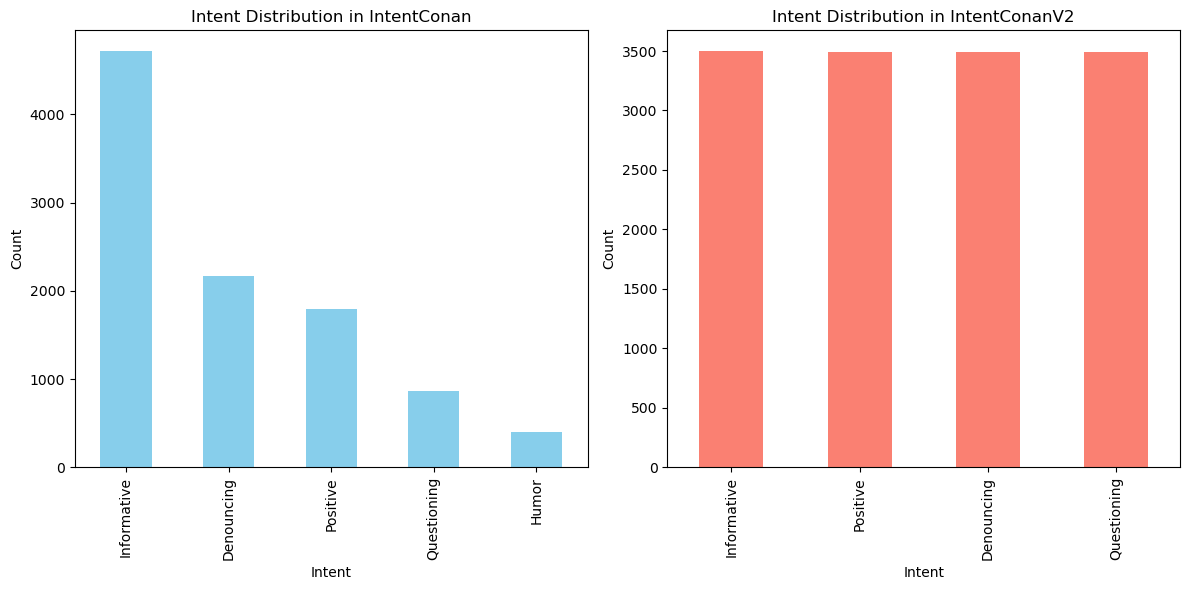

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
iconan_train = pd.read_csv('data/iconan/iconan_train.csv')
iconan_test = pd.read_csv('data/iconan/iconan_test.csv')
iconan_dev = pd.read_csv('data/iconan/iconan_dev.csv')
iconanv2_train = pd.read_csv('data/iconanv2/train.csv')
iconanv2_test = pd.read_csv('data/iconanv2/test.csv')
iconanv2_val = pd.read_csv('data/iconanv2/val.csv')

# Combining data for analysis
iconan = pd.concat([iconan_train, iconan_test, iconan_dev])
iconanv2 = pd.concat([iconanv2_train, iconanv2_test, iconanv2_val])

# Intent distribution for both datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
iconan['cnType'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Intent Distribution in IntentConan')
plt.xlabel('Intent')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
iconanv2['csType'].value_counts().plot(kind='bar', color='salmon')
plt.title('Intent Distribution in IntentConanV2')
plt.xlabel('Intent')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Text Length Analysis

IntentConan Text Length:
 count    9947.000000
mean      135.185483
std        66.433023
min         4.000000
25%        89.000000
50%       127.000000
75%       170.000000
max       956.000000
Name: text_length, dtype: float64
IntentConanV2 Text Length:
 count    13973.000000
mean       230.255493
std        165.134874
min          3.000000
25%        118.000000
50%        158.000000
75%        364.000000
max        781.000000
Name: text_length, dtype: float64


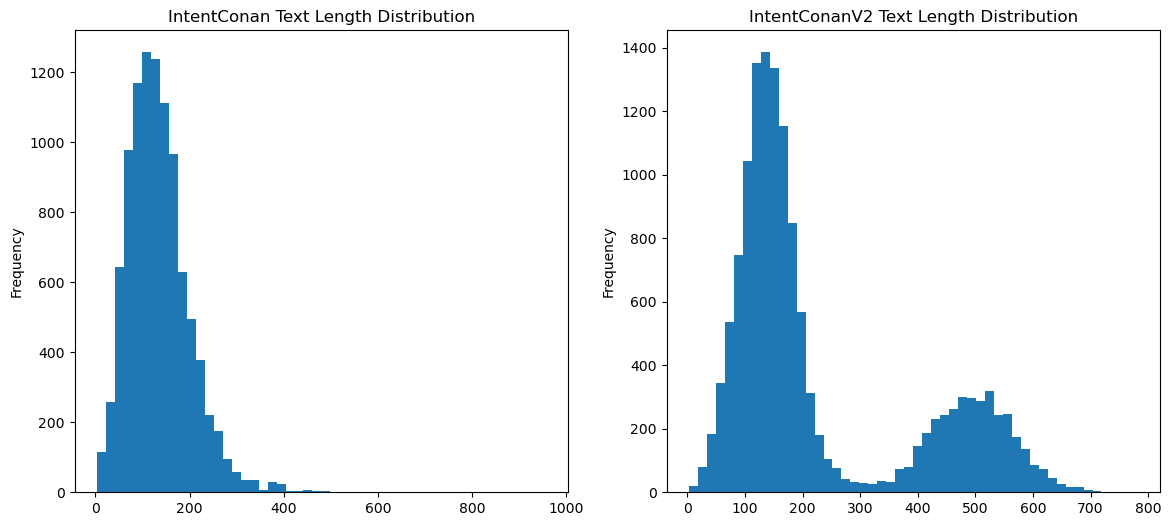

In [68]:
# New column for text length
iconan['text_length'] = iconan['counterSpeech'].apply(len)
iconanv2['text_length'] = iconanv2['counterspeech'].apply(len)

# Describe text lengths
iconan_text_length = iconan['text_length'].describe()
iconanv2_text_length = iconanv2['text_length'].describe()

print("IntentConan Text Length:\n", iconan_text_length)
print("IntentConanV2 Text Length:\n", iconanv2_text_length)

# Histograms of text length distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
iconan['text_length'].plot(kind='hist', bins=50, ax=ax[0], title='IntentConan Text Length Distribution')
iconanv2['text_length'].plot(kind='hist', bins=50, ax=ax[1], title='IntentConanV2 Text Length Distribution')
plt.show()


# Intent-wise Counterspeech Length Analysis

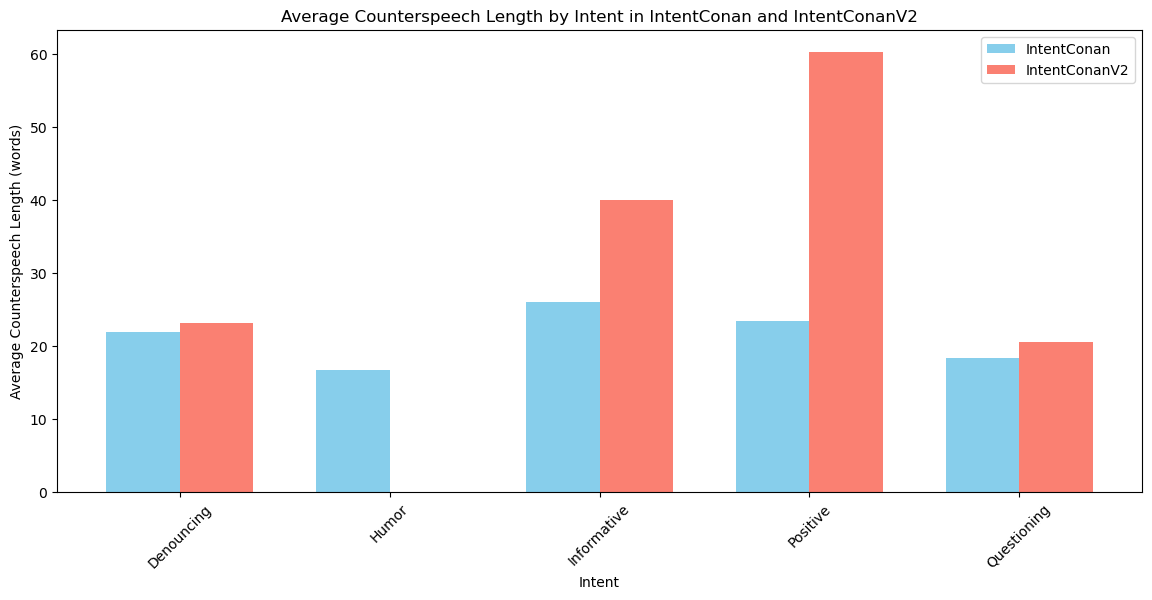

In [69]:
import numpy as np

# Counterspeech lengths
iconan['cs_length'] = iconan['counterSpeech'].str.split().apply(len)
iconanv2['cs_length'] = iconanv2['counterspeech'].str.split().apply(len)

# Mean lengths
mean_iconan = iconan.groupby('cnType')['cs_length'].mean()
mean_iconanv2 = iconanv2.groupby('csType')['cs_length'].mean()

intents = mean_iconan.index.union(mean_iconanv2.index)  # combine intents from both datasets
iconan_means = mean_iconan.reindex(intents, fill_value=0)
iconanv2_means = mean_iconanv2.reindex(intents, fill_value=0)

# Grouped Bar Chart for Mean Length Comparison
plt.figure(figsize=(14, 6))
width = 0.35
indices = np.arange(len(intents))

plt.bar(indices, iconan_means, width=width, color='skyblue', label='IntentConan')
plt.bar(indices + width, iconanv2_means, width=width, color='salmon', label='IntentConanV2')

plt.title('Average Counterspeech Length by Intent in IntentConan and IntentConanV2')
plt.xlabel('Intent')
plt.ylabel('Average Counterspeech Length (words)')
plt.xticks(indices + width / 2, intents, rotation=45)
plt.legend()
plt.show()


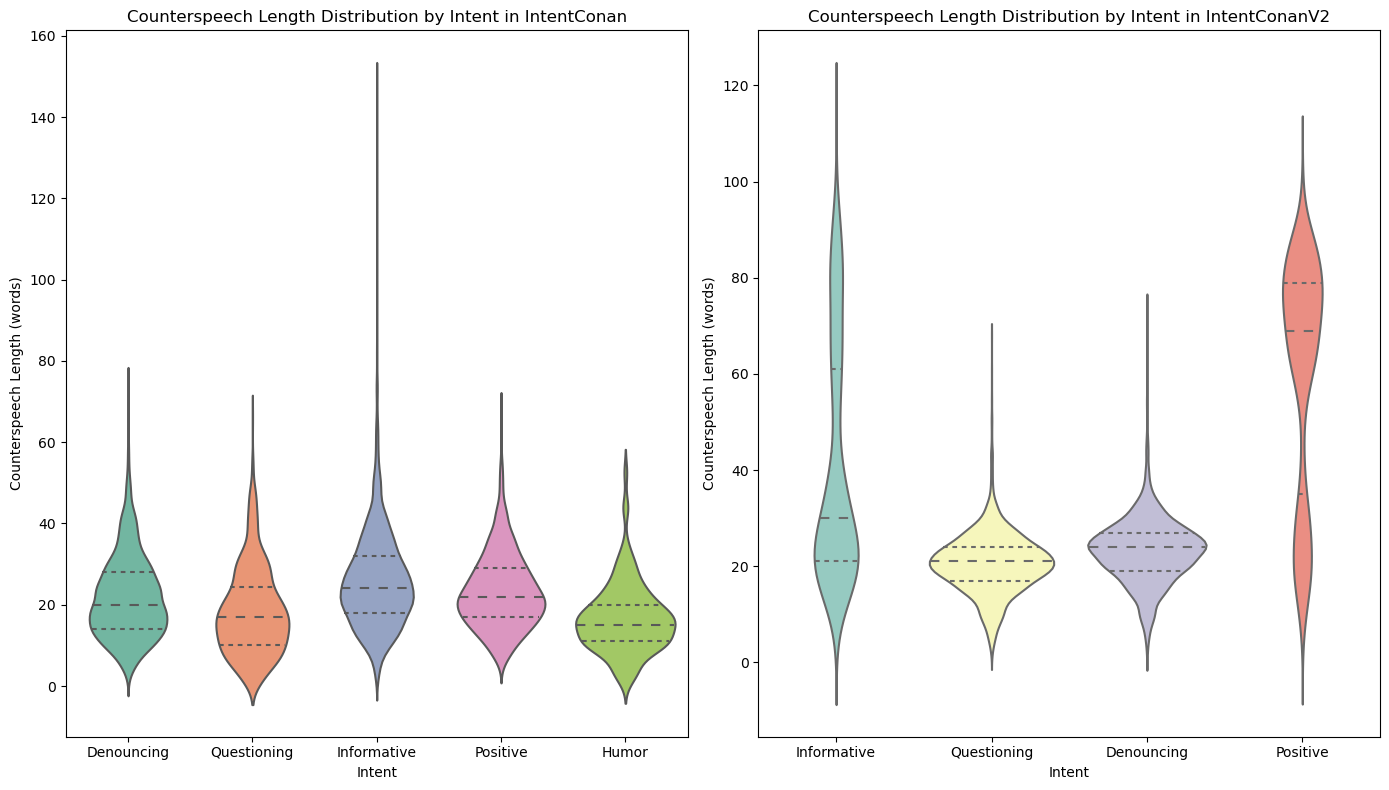

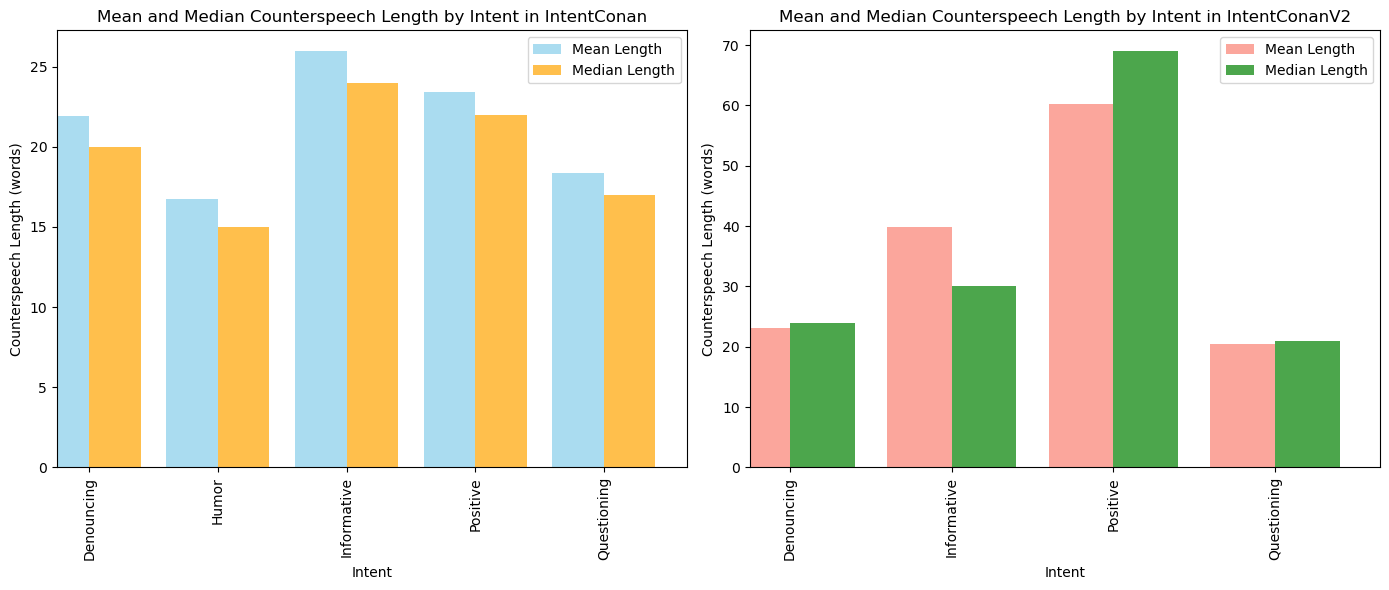

In [70]:
import seaborn as sns

# Violin plot of counterspeech lengths by intent for IntentConan
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.violinplot(x='cnType', y='cs_length', data=iconan, inner="quartile", palette='Set2')
plt.title('Counterspeech Length Distribution by Intent in IntentConan')
plt.xlabel('Intent')
plt.ylabel('Counterspeech Length (words)')

# Violin plot of counterspeech lengths by intent for IntentConanV2
plt.subplot(1, 2, 2)
sns.violinplot(x='csType', y='cs_length', data=iconanv2, inner="quartile", palette='Set3')
plt.title('Counterspeech Length Distribution by Intent in IntentConanV2')
plt.xlabel('Intent')
plt.ylabel('Counterspeech Length (words)')

plt.tight_layout()
plt.show()

# Bar chart showing mean and median counterspeech lengths by intent for both datasets
mean_lengths_iconan = iconan.groupby('cnType')['cs_length'].mean()
median_lengths_iconan = iconan.groupby('cnType')['cs_length'].median()
mean_lengths_iconanv2 = iconanv2.groupby('csType')['cs_length'].mean()
median_lengths_iconanv2 = iconanv2.groupby('csType')['cs_length'].median()

intents_iconan = mean_lengths_iconan.index
intents_iconanv2 = mean_lengths_iconanv2.index

# Plot for IntentConan
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
mean_lengths_iconan.plot(kind='bar', color='skyblue', alpha=0.7, label='Mean Length', width=0.4, position=1)
median_lengths_iconan.plot(kind='bar', color='orange', alpha=0.7, label='Median Length', width=0.4, position=0)
plt.title('Mean and Median Counterspeech Length by Intent in IntentConan')
plt.xlabel('Intent')
plt.ylabel('Counterspeech Length (words)')
plt.legend()

# Plot for IntentConanV2
plt.subplot(1, 2, 2)
mean_lengths_iconanv2.plot(kind='bar', color='salmon', alpha=0.7, label='Mean Length', width=0.4, position=1)
median_lengths_iconanv2.plot(kind='bar', color='green', alpha=0.7, label='Median Length', width=0.4, position=0)
plt.title('Mean and Median Counterspeech Length by Intent in IntentConanV2')
plt.xlabel('Intent')
plt.ylabel('Counterspeech Length (words)')
plt.legend()

plt.tight_layout()
plt.show()


# Intent Distribution by Target Group

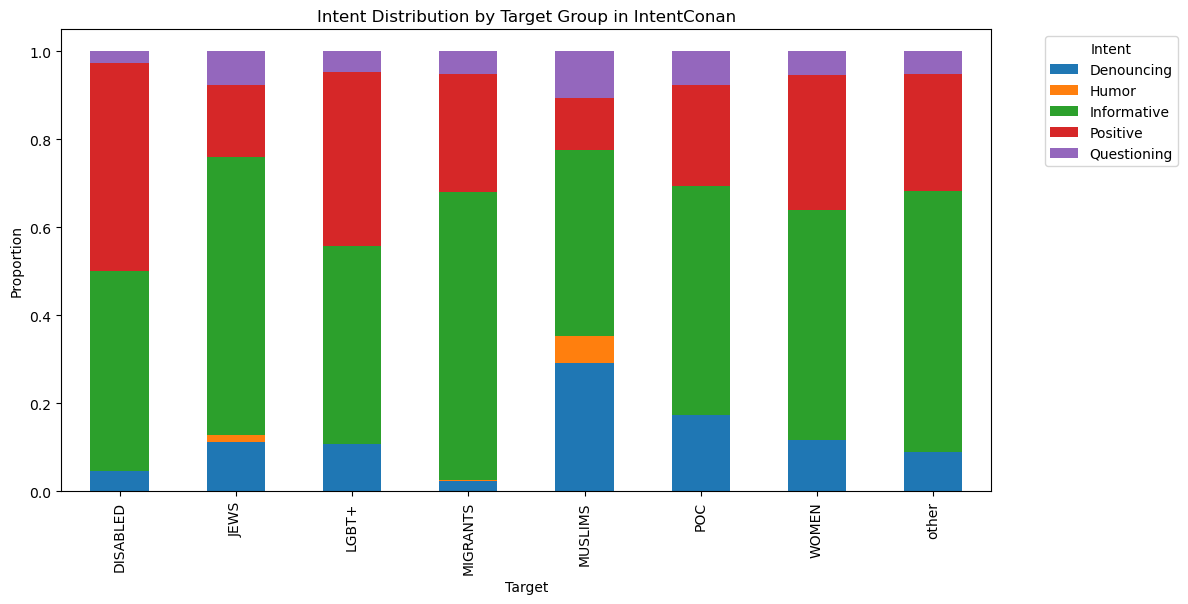

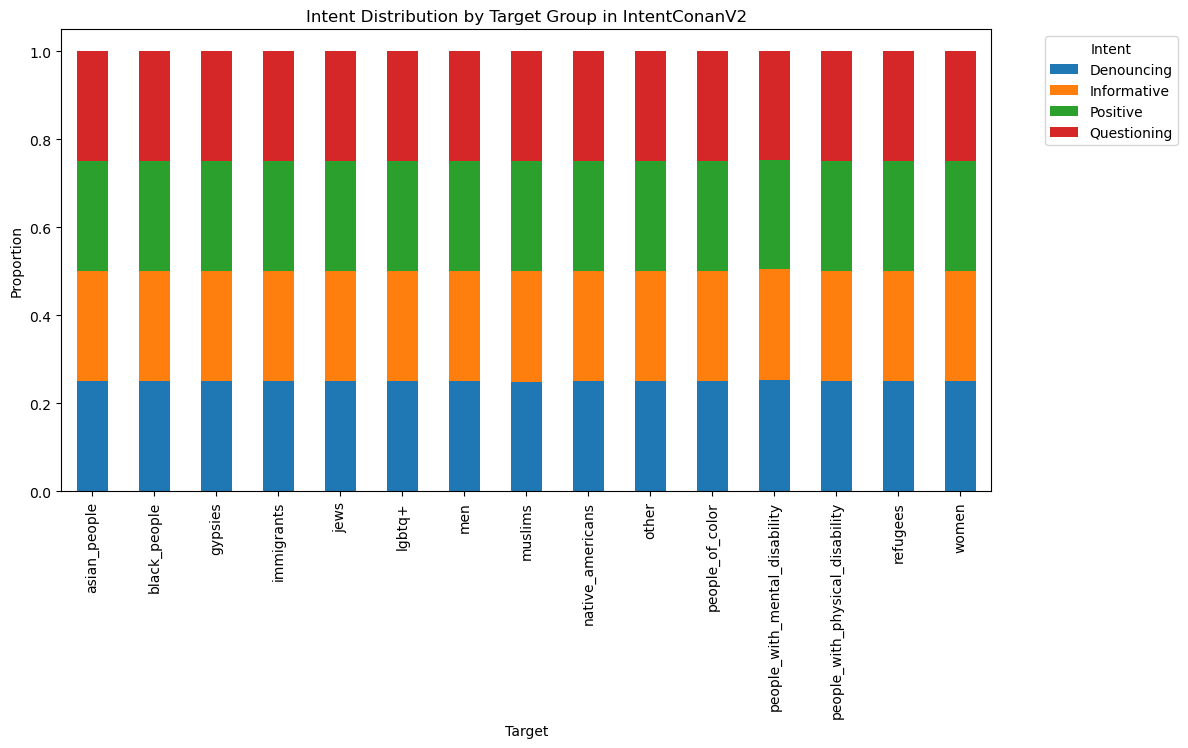

In [71]:
# Intent distribution by target group in IntentConan
iconan.groupby('Target')['cnType'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Intent Distribution by Target Group in IntentConan')
plt.xlabel('Target')
plt.ylabel('Proportion')
plt.legend(title='Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Intent distribution by target group in IntentConanV2
iconanv2.groupby('hatespeechTarget')['csType'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Intent Distribution by Target Group in IntentConanV2')
plt.xlabel('Target')
plt.ylabel('Proportion')
plt.legend(title='Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


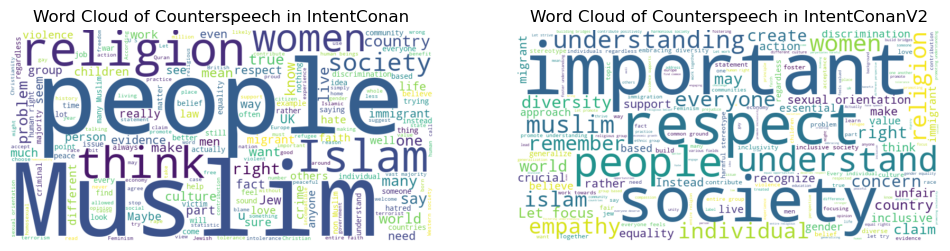

In [72]:
from wordcloud import WordCloud

# Word cloud for counterspeech in both datasets
plt.figure(figsize=(12, 6))
wordcloud_iconan = WordCloud(width=800, height=400, background_color='white').generate(' '.join(iconan['counterSpeech'].dropna()))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_iconan, interpolation='bilinear')
plt.title('Word Cloud of Counterspeech in IntentConan')
plt.axis('off')


wordcloud_iconanv2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(iconanv2['counterspeech'].dropna()))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_iconanv2, interpolation='bilinear')
plt.title('Word Cloud of Counterspeech in IntentConanV2')
plt.axis('off')

plt.show()
